In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
raw_data=pd.read_csv('data_cleaned.csv')

In [3]:
raw_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,88792836,100654011,3,1,8,5.0,3,3,1,10,...,1,2,1,1,1,1,1,2,2,3
1,88986678,58682736,3,0,9,4.0,1,11,5,6,...,1,2,1,1,1,1,1,1,2,1
2,89032962,69250302,3,0,7,6.0,1,1,7,2,...,1,1,1,1,1,1,1,1,2,2
3,89191392,62022042,3,0,5,5.0,1,3,7,3,...,1,1,1,1,1,1,1,1,2,2
4,89277516,30950811,3,0,6,6.0,3,1,1,2,...,1,1,1,1,1,1,1,1,2,2


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              932 non-null    int64  
 1   patient_nbr               932 non-null    int64  
 2   race                      932 non-null    int64  
 3   gender                    932 non-null    int64  
 4   age                       932 non-null    int64  
 5   weight                    932 non-null    float64
 6   admission_type_id         932 non-null    int64  
 7   discharge_disposition_id  932 non-null    int64  
 8   admission_source_id       932 non-null    int64  
 9   time_in_hospital          932 non-null    int64  
 10  payer_code                932 non-null    int64  
 11  medical_specialty         932 non-null    int64  
 12  num_lab_procedures        932 non-null    int64  
 13  num_procedures            932 non-null    int64  
 14  num_medica

In [12]:
#some of the categories does not make sense, like the id of encounter,id of patients, payer code, so I drop these columns.
raw_data.drop('encounter_id',axis=1,inplace=True)
raw_data.drop('patient_nbr',axis=1,inplace=True)
raw_data.drop('payer_code',axis=1,inplace=True)
raw_data.drop('number_outpatient',axis=1,inplace=True)
raw_data.drop('number_inpatient',axis=1,inplace=True)
raw_data.drop('number_emergency',axis=1,inplace=True)
raw_data.drop('num_lab_procedures',axis=1,inplace=True)
raw_data.drop('num_procedures',axis=1,inplace=True)
raw_data.drop('num_medications',axis=1,inplace=True)

In [13]:
raw_data

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,diag_1,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,1,8,5.0,3,3,1,10,10,715,...,1,2,1,1,1,1,1,2,2,3
1,3,0,9,4.0,1,11,5,6,60,250.2,...,1,2,1,1,1,1,1,1,2,1
2,3,0,7,6.0,1,1,7,2,68,414,...,1,1,1,1,1,1,1,1,2,2
3,3,0,5,5.0,1,3,7,3,25,296,...,1,1,1,1,1,1,1,1,2,2
4,3,0,6,6.0,3,1,1,2,10,196,...,1,1,1,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,4,0,8,5.0,1,1,7,1,53,584,...,1,2,1,1,1,1,1,1,2,1
928,3,0,4,6.0,1,1,7,4,60,250.8,...,1,1,1,1,1,1,1,1,1,1
929,3,0,7,6.0,1,1,7,3,53,435,...,1,1,1,1,1,1,1,1,2,1
930,3,1,8,4.0,1,3,7,13,53,486,...,1,1,1,1,1,1,1,2,2,1


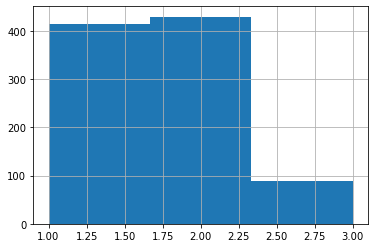

In [5]:
_=raw_data['readmitted'].hist(bins=3)
# About 400 records show no readmitted, while other about 500 records show readmitted.

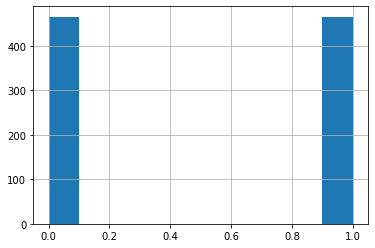

In [6]:
_=raw_data['gender'].hist()

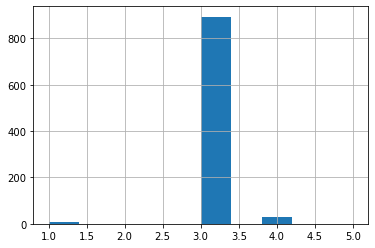

In [7]:
_=raw_data['race'].hist()
#it has balanced in race, but it's inevitable. 

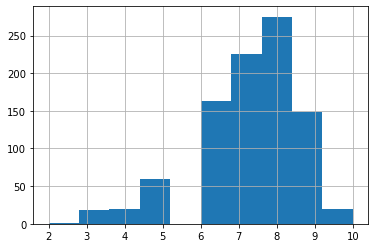

In [8]:
_=raw_data['age'].hist()
#sample in age is not balanced, but as the dataset is collected in diabate patients, it is inevitable

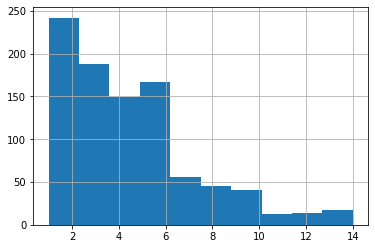

In [9]:
_=raw_data['time_in_hospital'].hist()

In [107]:
def drop_row(df,column,letter):
    df=df.reset_index(drop=True)
    for i in range(df.shape[0]):
        if df[column][i][0]==letter:
            df.drop(i,axis=0,inplace=True)
    return df
raw_data=drop_row(raw_data,'diag_1','E')
raw_data=drop_row(raw_data,'diag_1','V')
raw_data=drop_row(raw_data,'diag_3','E')
raw_data=drop_row(raw_data,'diag_3','V')

In [108]:
df_1=pd.DataFrame(raw_data['diag_1'])
df_2=pd.DataFrame(raw_data['diag_2'])
df_3=pd.DataFrame(raw_data['diag_3'])
df_1=df_1.rename(columns={'diag_1':'diag'})
df_2=df_2.rename(columns={'diag_2':'diag'})
df_3=df_3.rename(columns={'diag_3':'diag'})

In [109]:
df_1.loc[:,'collection'] = 'diag_1'
df_2.loc[:,'collection'] = 'diag_2'
df_3.loc[:,'collection'] = 'diag_3'

In [110]:
df=df_1.append(df_2,ignore_index = True)

In [111]:
df=df.append(df_3,ignore_index = True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   diag        2673 non-null   object
 1   collection  2673 non-null   object
dtypes: object(2)
memory usage: 41.9+ KB


In [113]:
pd.to_numeric(df['diag'])

0       715.0
1       250.2
2       414.0
3       296.0
4       196.0
        ...  
2668    438.0
2669    682.0
2670    414.0
2671    276.0
2672    272.0
Name: diag, Length: 2673, dtype: float64

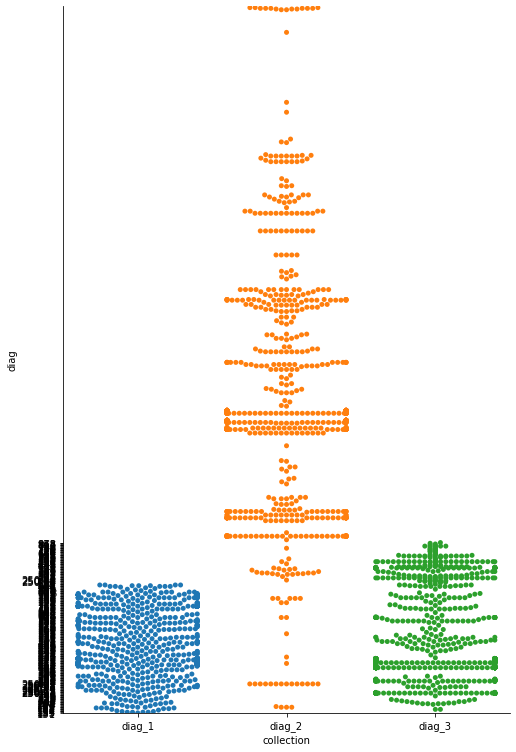

In [122]:
plt.figure(figsize=(8,13))
sns.swarmplot(data=df,x='collection',y='diag')
plt.ylim(0,1000)
sns.despine()
plt.show()

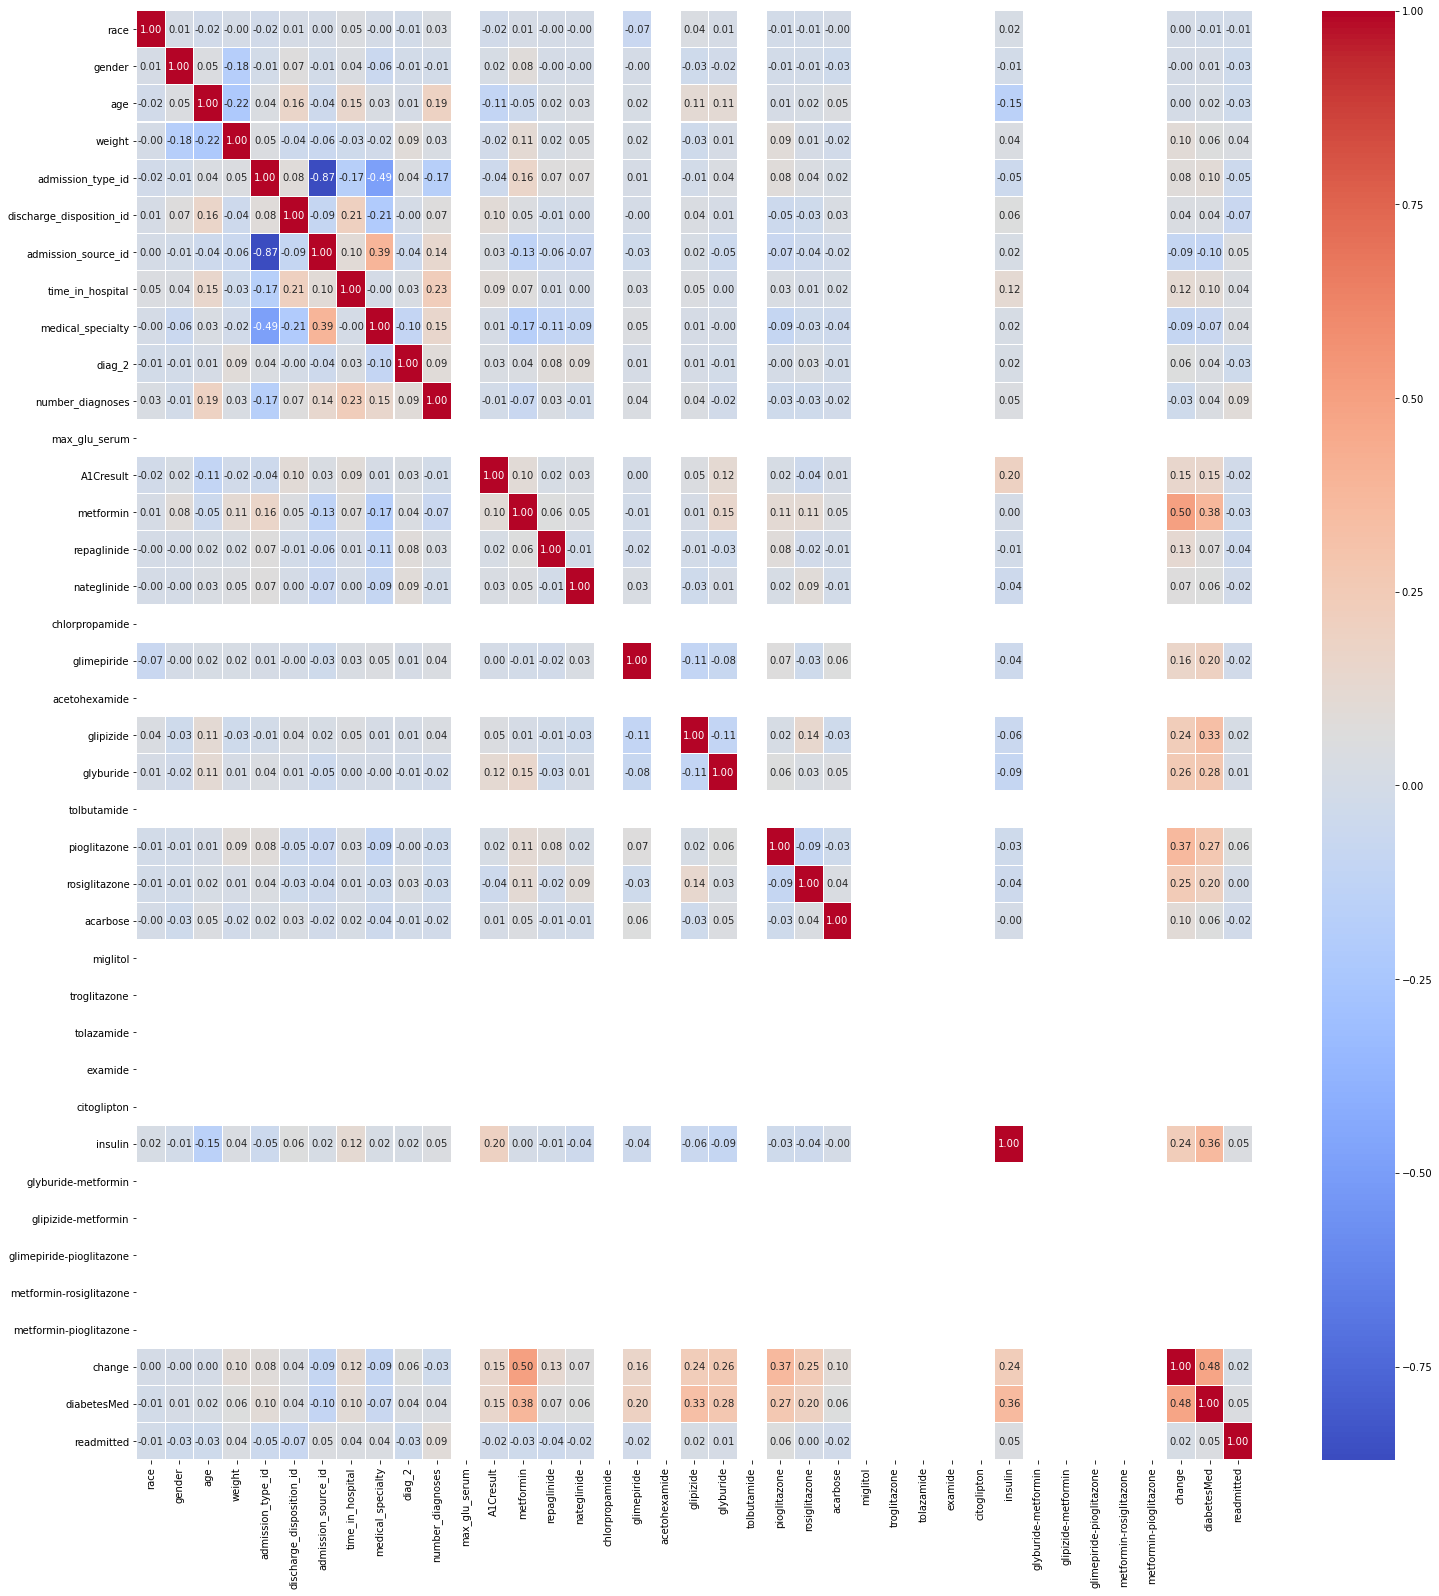

In [126]:
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(25, 25))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)